In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In /home/fatma/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/fatma/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/fatma/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/fatma/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/fatma/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylel

In [2]:
attribution_scores = pd.read_csv("attribution_scores/bert_with_fine_tuning/wikipedia_aggression_1000_data_fine_tuned_bert_attribution_scores.csv")

In [3]:
attenion_weigths = pd.read_csv("attention_maps/bert_with_fine_tuning/attention_weights_for_1000_data.csv")

In [4]:
attribution_scores["abs_attribution"] = [np.absolute(i) for i in attribution_scores.attribution]

In [5]:
word_attribution_grp = attribution_scores.groupby(attribution_scores["words"])

In [6]:
import numpy as np

unique_words = []
avg_attribution = []
avg_abs_attribution = []
no_occurances = []
for name,grp in word_attribution_grp:
    unique_words.append(name)
    avg_attribution.append(np.mean(grp["attribution"]))
    avg_abs_attribution.append(np.mean(grp["abs_attribution"]))
    no_occurances.append(len(grp["attribution"]))

In [7]:
word_attribution_unique = {}
word_attribution_unique["unique_words"] = unique_words
word_attribution_unique["attribution"] = avg_attribution
word_attribution_unique["abs_attribution"] = avg_abs_attribution
word_attribution_unique["No_occurences"] = no_occurances

In [8]:
word_attribution_unique_df = pd.DataFrame.from_dict(word_attribution_unique)

In [9]:
len(word_attribution_unique_df)

5893

In [10]:
word_attribution_unique_df.head(5)

,unique_words,attribution,abs_attribution,No_occurences
0,!,-0.009193,0.028166,190
1,##0,0.000007,0.000008,9
2,##1,0.008586,0.008586,6
3,##100,-0.000002,0.000002,1
4,##11,0.004950,0.004950,3


In [11]:
attenion_weigths.head(5)

,word,attention_map
0,[CLS],{1: {1: 0.0356258861720562}}
1,[CLS],{1: {2: 0.020374972373247147}}
2,[CLS],{1: {3: 0.36324000358581543}}
3,[CLS],{1: {4: 0.03803560137748718}}
4,[CLS],{1: {5: 0.06432480365037918}}


In [12]:
len(attenion_weigths)

4196736

In [13]:
unique_words_attention = []

for g, i in attenion_weigths.groupby("word"):
    unique_words_attention.append(g)

In [14]:
len(unique_words_attention)

4459

In [15]:
unique_words_attention_common = [i for i in unique_words_attention if i in list(word_attribution_unique_df.unique_words.values)]


In [16]:
len(unique_words_attention_common)

4457

In [17]:
common_words_attention = attenion_weigths[attenion_weigths["word"].isin(unique_words_attention_common)]

In [18]:
len(common_words_attention)

3908736

In [19]:
def generate_attention_attention_layers_per_head_for_word(word,attention_map_df):
  import ast
  frames = []
  #len(attention_map_df[attention_map_df["word"]==word]["attention_map"].values)
  for i in attention_map_df[attention_map_df["word"]==word]["attention_map"].values:
    frames.append(pd.DataFrame.from_dict(ast.literal_eval(i)))
  res = pd.concat(frames)
  res = res.fillna(0)
  res = res.groupby(res.index).mean()
  return res

In [20]:
mean_attetnion_weigth_of_last_layers = []
for i in unique_words_attention_common:
    res = generate_attention_attention_layers_per_head_for_word(i,common_words_attention)
    avg_head_res_ft = res.mean(axis=1).values
    mean_attetnion_weigth_of_last_layers.append(np.mean(avg_head_res_ft[-4:]))

In [21]:
attribution_scores_common = word_attribution_unique_df[word_attribution_unique_df["unique_words"].isin(unique_words_attention_common)]

In [22]:
attribution_scores_common = attribution_scores_common.sort_values("unique_words")

In [23]:
attribution_scores_common_list = []
for i in unique_words_attention_common:
    index = unique_words_attention_common.index(i)
    attribution_scores_common = word_attribution_unique_df[word_attribution_unique_df["unique_words"] == i]
    attribution_scores_common["avg_attention_weigth_in_last_layers"] = mean_attetnion_weigth_of_last_layers[index]
    #attribution_scores_common["max_attention_weigth_in_last_layers"] = max_attetnion_weigth_of_last_layers[index]
    attribution_scores_common_list.append(attribution_scores_common)

/home/fatma/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [24]:
attribution_scores_common = pd.concat(attribution_scores_common_list)

In [25]:
len(attribution_scores_common)

4457

In [26]:
attribution_scores_common.head()

,unique_words,attribution,abs_attribution,No_occurences,avg_attention_weigth_in_last_layers
0,!,-0.009193,0.028166,190,0.001485
1,##0,0.000007,0.000008,9,0.001573
2,##1,0.008586,0.008586,6,0.001691
3,##100,-0.000002,0.000002,1,0.002044
4,##11,0.004950,0.004950,3,0.001906


In [27]:
len(attribution_scores_common)

4457

In [28]:
df = attribution_scores_common[["attribution", "abs_attribution" ,"No_occurences", "avg_attention_weigth_in_last_layers"]]

In [29]:
df.corr()

,attribution,abs_attribution,No_occurences,avg_attention_weigth_in_last_layers
attribution,1.000000,0.297667,-0.008442,0.063828
abs_attribution,0.297667,1.000000,-0.009922,0.125470
No_occurences,-0.008442,-0.009922,1.000000,-0.101320
avg_attention_weigth_in_last_layers,0.063828,0.125470,-0.101320,1.000000


Text(0.5, 0, 'Absolute attribution score')

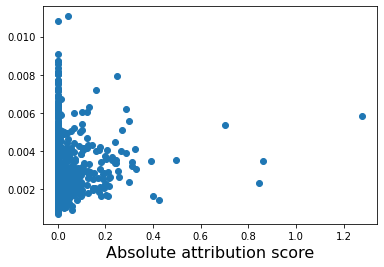

In [30]:
plt.scatter(attribution_scores_common["abs_attribution"], attribution_scores_common["avg_attention_weigth_in_last_layers"])
plt.xlabel("Absolute attribution score",fontsize=16)
#plt.ylabel("Average attention weigth in the last 4 layers",fontsize=16)

In [31]:
attribution_scores_common[attribution_scores_common["avg_attention_weigth_in_last_layers"]>5]

,unique_words,attribution,abs_attribution,No_occurences,avg_attention_weigth_in_last_layers


In [32]:
attribution_scores_common[attribution_scores_common["abs_attribution"]>0.5]

,unique_words,attribution,abs_attribution,No_occurences,avg_attention_weigth_in_last_layers
586,##lz,0.860460,0.860460,1,0.003500
1831,ca,-0.842730,0.842741,3,0.002359
1851,canadian,0.703745,0.703745,1,0.005364
5087,smell,-1.154960,1.277921,4,0.005858


In [33]:
attribution_scores_common[attribution_scores_common["No_occurences"] == np.max(attribution_scores_common["No_occurences"] )]

,unique_words,attribution,abs_attribution,No_occurences,avg_attention_weigth_in_last_layers
1116,.,-0.000885,0.002712,1827,0.001976


Text(0.5, 0, 'Number of occurences')

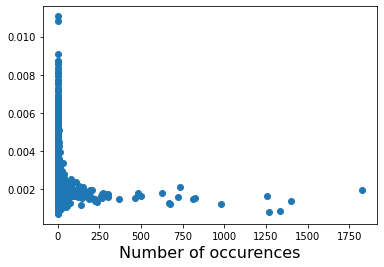

In [34]:
plt.scatter(attribution_scores_common["No_occurences"], attribution_scores_common["avg_attention_weigth_in_last_layers"])
plt.xlabel("Number of occurences",fontsize=16)
#plt.ylabel("Average attention weigth in the last 4 layers")

array([[<AxesSubplot:xlabel='attribution', ylabel='attribution'>,
        <AxesSubplot:xlabel='abs_attribution', ylabel='attribution'>,
        <AxesSubplot:xlabel='No_occurences', ylabel='attribution'>,
        <AxesSubplot:xlabel='avg_attention_weigth_in_last_layers', ylabel='attribution'>],
       [<AxesSubplot:xlabel='attribution', ylabel='abs_attribution'>,
        <AxesSubplot:xlabel='abs_attribution', ylabel='abs_attribution'>,
        <AxesSubplot:xlabel='No_occurences', ylabel='abs_attribution'>,
        <AxesSubplot:xlabel='avg_attention_weigth_in_last_layers', ylabel='abs_attribution'>],
       [<AxesSubplot:xlabel='attribution', ylabel='No_occurences'>,
        <AxesSubplot:xlabel='abs_attribution', ylabel='No_occurences'>,
        <AxesSubplot:xlabel='No_occurences', ylabel='No_occurences'>,
        <AxesSubplot:xlabel='avg_attention_weigth_in_last_layers', ylabel='No_occurences'>],
       [<AxesSubplot:xlabel='attribution', ylabel='avg_attention_weigth_in_last_layers'>,
 

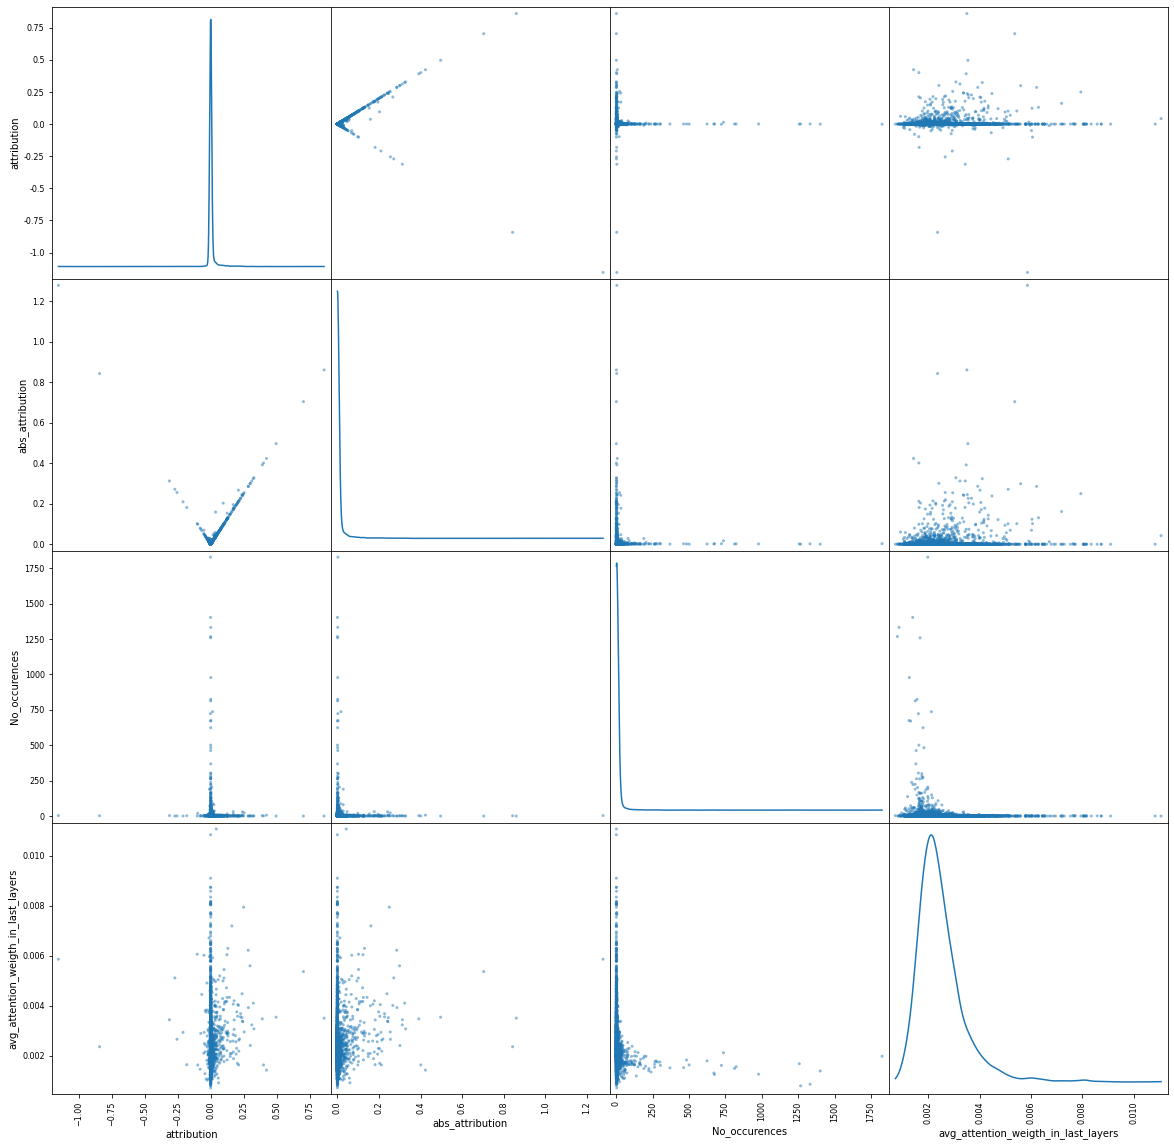

In [35]:
pd.plotting.scatter_matrix(df, figsize=(20, 20),diagonal='kde')

In [112]:
abs_attribution_correlation = np.correlate(attribution_scores_common["abs_attribution"],attribution_scores_common["abs_attribution"])

In [113]:
attention_weigths_correlation = np.correlate(attribution_scores_common["avg_attention_weigth_in last layers"],attribution_scores_common["avg_attention_weigth_in last layers"])

KeyError: 'avg_attention_weigth_in last layers'

In [ ]:
plt.scatter(attribution_scores_common["abs_attribution"],\
           attribution_scores_common["avg_attention_weigth_in last layers"])

In [94]:
np.corrcoef(attribution_scores_common["abs_attribution"],\
           attribution_scores_common["avg_attention_weigth_in last layers"])

array([[ 1.        , -0.00144164],
       [-0.00144164,  1.        ]])

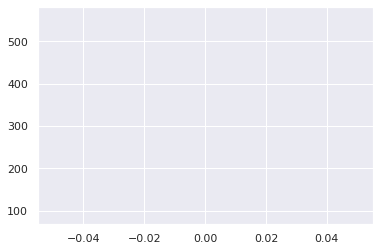

In [84]:
plt.plot(abs_attribution_correlation)
plt.plot(attention_weigths_correlation)

In [81]:
len(abs_attribution_avg_attention_weigths)

6761

In [90]:
attribution_avg_attention_weigths = np.correlate(attribution_scores_common["abs_attribution"],attribution_scores_common["avg_attention_weigth_in last layers"],"same")

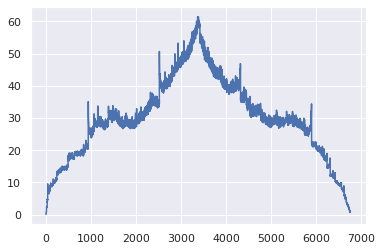

In [91]:
plt.plot(abs_attribution_avg_attention_weigths)

In [78]:
attribution_avg_attention_weigths = np.correlate(attribution_scores_common["attribution"],attribution_scores_common["avg_attention_weigth_in last layers"],"full")

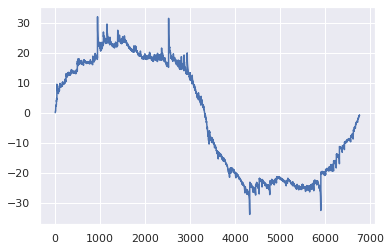

In [79]:
plt.plot(attribution_avg_attention_weigths)